# I. PREFACE

## Identity

## Big Picture of the Dataset

## Goals to be Achieved

# II. LIBRARIES

In [10]:
# calculate number
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from matplotlib.ticker import MultipleLocator


# Save model
import pickle
import json

# Splitting data train-test
from sklearn.model_selection import train_test_split

# Scaling
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder

#Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score,make_scorer
from sklearn.model_selection import cross_val_score
import time


In [2]:
# global setting
pd.set_option('display.max_columns', None)

# III. DATA LOADING

In [3]:
# load dataset
df = pd.read_csv("data_clean.csv")
df.head()

,age,job,marital,education,has_credit,balance,housing_loan,loan,contact,day,month,duration,campaign,days_passed,previous,outcome_passed,subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,october,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,april,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,juny,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4521 non-null   int64 
 1   job             4521 non-null   object
 2   marital         4521 non-null   object
 3   education       4521 non-null   object
 4   has_credit      4521 non-null   object
 5   balance         4521 non-null   int64 
 6   housing_loan    4521 non-null   object
 7   loan            4521 non-null   object
 8   contact         4521 non-null   object
 9   day             4521 non-null   int64 
 10  month           4521 non-null   object
 11  duration        4521 non-null   int64 
 12  campaign        4521 non-null   int64 
 13  days_passed     4521 non-null   int64 
 14  previous        4521 non-null   int64 
 15  outcome_passed  4521 non-null   object
 16  subscribed      4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
has_credit        0
balance           0
housing_loan      0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
days_passed       0
previous          0
outcome_passed    0
subscribed        0
dtype: int64

In [6]:
df.duplicated().sum()

0

# IV. EDA

## Variable Correlation

In [7]:
numerical_value = ['balance', 'duration',"days_passed",'campaign']
category_value = ["age", 'job', 'marital','education', 'has_credit','housing_loan',
       'loan', 'contact', 'day', 'month', 'previous', 'outcome_passed']

In [11]:
for i in numerical_value:
    result, p_value = stats.kendalltau(df[i], df["subscribed"])
    print(i)
    print(f'correlation coefficient: {result}')
    print(f'p_value: {p_value}')
    print("")

balance
correlation coefficient: 0.0646945618080515
p_value: 1.0960339523721125e-07

duration
correlation coefficient: 0.284819222297052
p_value: 2.3283218961382774e-121

days_passed
correlation coefficient: 0.14352189161218565
p_value: 5.715885885811954e-24

campaign
correlation coefficient: -0.058362689183631564
p_value: 1.3996722081781446e-05



In [12]:
for i in category_value:
    table = pd.crosstab(df[i], df["subscribed"])
    chi2, p_value, dof, expected = stats.chi2_contingency(table)
    result = np.sqrt(chi2 / df.shape[0])
    
    print(i)
    print(f'correlation coefficient: {result}')
    print(f'p_value: {p_value}')
    print("")

age
correlation coefficient: 0.20569052477755737
p_value: 3.966667086645416e-14

job
correlation coefficient: 0.1235294259608967
p_value: 1.901391096662705e-10

marital
correlation coefficient: 0.06487879626537206
p_value: 7.373535401823763e-05

education
correlation coefficient: 0.058053243367139414
p_value: 0.001625240003630989

has_credit
correlation coefficient: 0.0
p_value: 1.0

housing_loan
correlation coefficient: 0.10398457120534615
p_value: 2.7146998959323014e-12

loan
correlation coefficient: 0.06955449857446128
p_value: 2.9148288298428256e-06

contact
correlation coefficient: 0.1394128177534659
p_value: 8.30430129641147e-20

day
correlation coefficient: 0.14189814126752298
p_value: 4.579005242301109e-08

month
correlation coefficient: 0.23538927243938482
p_value: 2.195354833570811e-47

previous
correlation coefficient: 0.1909159378980993
p_value: 2.0746723615738205e-23

outcome_passed
correlation coefficient: 0.29252933209523646
p_value: 1.5398831095860172e-83



## Bank Client Personal Information

### Age

In [100]:
df["age"].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

Bank client age vary from 19 to 87, and to make it easier for us to understand about age data we will do data creation based on their generation

In [33]:
generations = []

def get_generation(data):
    if 10 < data <= 25:
        generations.append("Gen Z")
    elif 26 < data <= 43:
        generations.append("Millennials")
    elif 44 < data <= 58:
        generations.append("Gen X")
    elif 59 < data <= 78:
        generations.append("Baby Boomers")
    else:
        generations.append("Silent Generation")

for age_value in df["age"]:
    get_generation(age_value)

df["generation"] = generations

In [47]:
table = pd.crosstab(df["generation"], df["subscribed"])
chi2, p_value, dof, expected = stats.chi2_contingency(table)
result = np.sqrt(chi2 / df.shape[0])
    
print(i)
print(f'correlation coefficient: {result}')
print(f'p_value: {p_value}')
print("")

outcome_passed
correlation coefficient: 0.12360104713932749
p_value: 3.569881418385324e-14



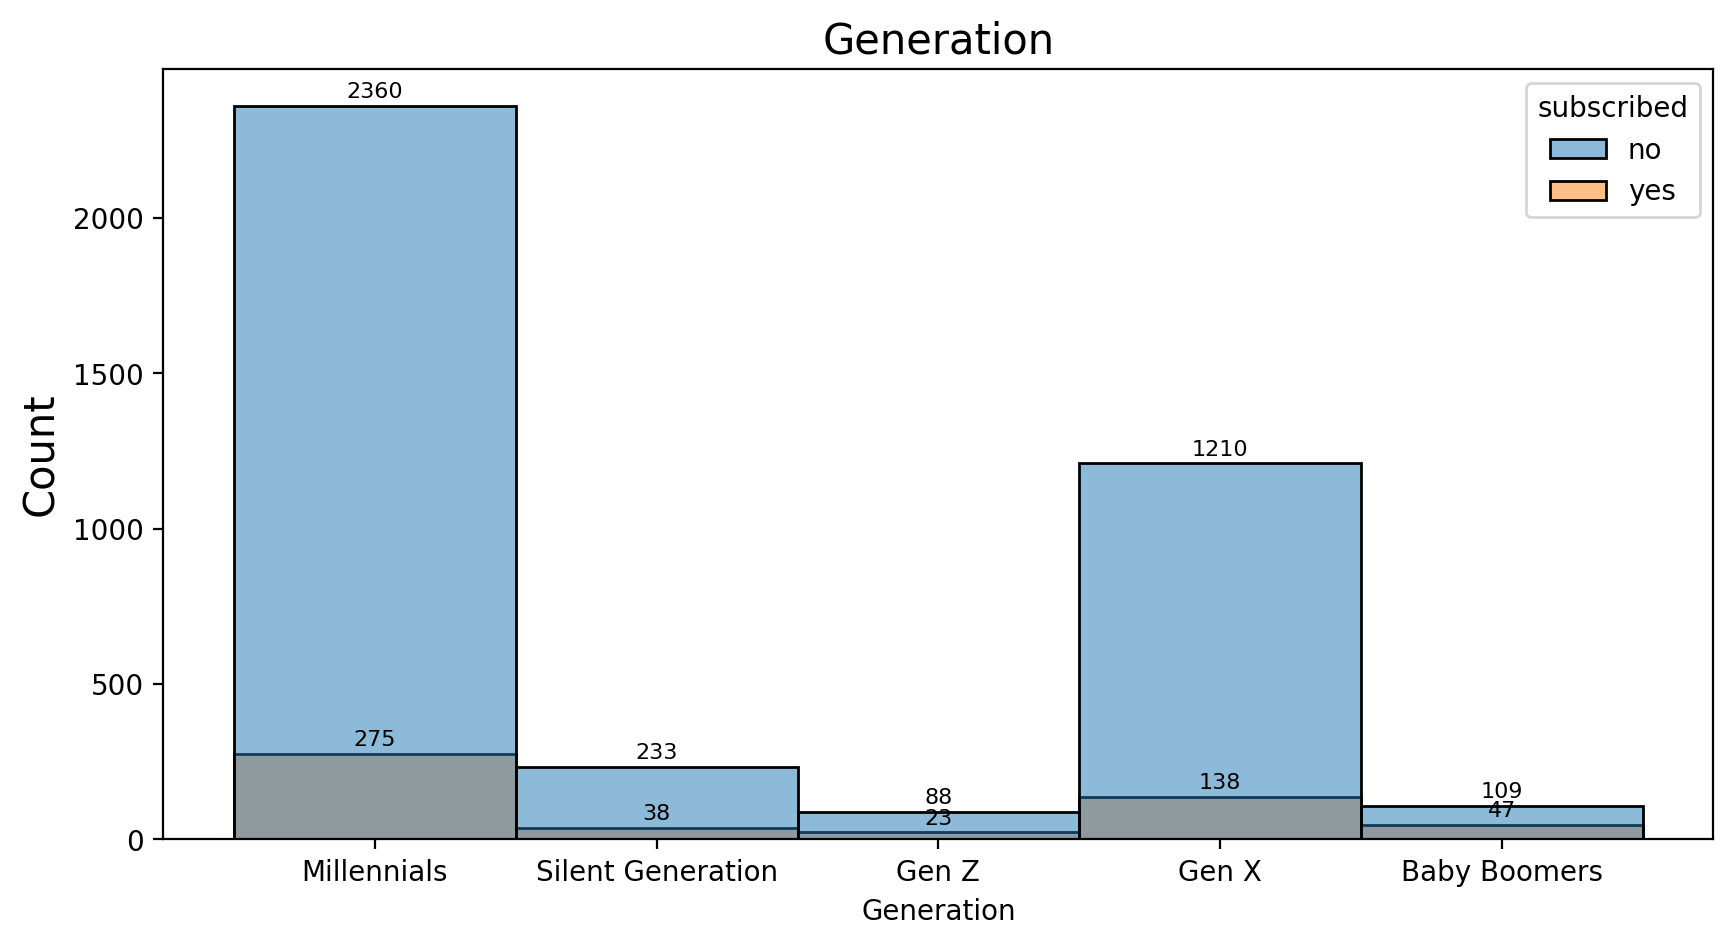

In [70]:
fig = plt.figure(figsize=(10, 5), dpi=200)

ax = sns.histplot(binwidth=0.5, x="generation", hue="subscribed", data=df, stat="count")
ax.set_title('Generation', size=15)
ax.set_xlabel('')
ax.set_ylabel('Count', size=15)
ax.set_xlabel('Generation')  # Add this line to set x-axis label
ax.set_ylabel('Count')  # Add this line to set y-axis label

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


Pada plot antara generasi dan subscription, terlihat bahwa mayoritas bank client campaign berada pada generasi Millenials dan Gen X. Selain dari informasi mengenai mayoritas umur dari bank client dapat diketahui juga mayoritas dari client menolak untuk subscription 

### Job

In [126]:
df.groupby(['job', 'subscribed']).size().reset_index(name='count')

,job,subscribed,count
0,admin.,no,420
1,admin.,yes,58
2,blue-collar,no,877
3,blue-collar,yes,69
4,entrepreneur,no,153
5,entrepreneur,yes,15
6,housemaid,no,98
7,housemaid,yes,14
8,management,no,838
9,management,yes,131


In [124]:
grouped_df = df.groupby(['job', 'subscribed']).size().reset_index(name='count')


pivot_df = grouped_df.pivot(index='job', columns='subscribed', values='count').fillna(0)


pivot_df['percentage_subscribed'] = (pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])) * 100
pivot_df['percentage_not_subscribed'] = (pivot_df['no'] / (pivot_df['yes'] + pivot_df['no'])) * 100


print(pivot_df)


subscribed      no  yes  percentage_subscribed  percentage_not_subscribed
job                                                                      
admin.         420   58              12.133891                  87.866109
blue-collar    877   69               7.293869                  92.706131
entrepreneur   153   15               8.928571                  91.071429
housemaid       98   14              12.500000                  87.500000
management     838  131              13.519092                  86.480908
retired        176   54              23.478261                  76.521739
self-employed  163   20              10.928962                  89.071038
services       379   38               9.112710                  90.887290
student         65   19              22.619048                  77.380952
technician     685   83              10.807292                  89.192708
unemployed     115   13              10.156250                  89.843750
unknown         31    7              1

C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\3984717088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="job", data=df, palette="Set3", ax=axes[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\3984717088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="percentage_subscribed", y="job", data=pivot_df, palette="Set3", ax=axes[1])


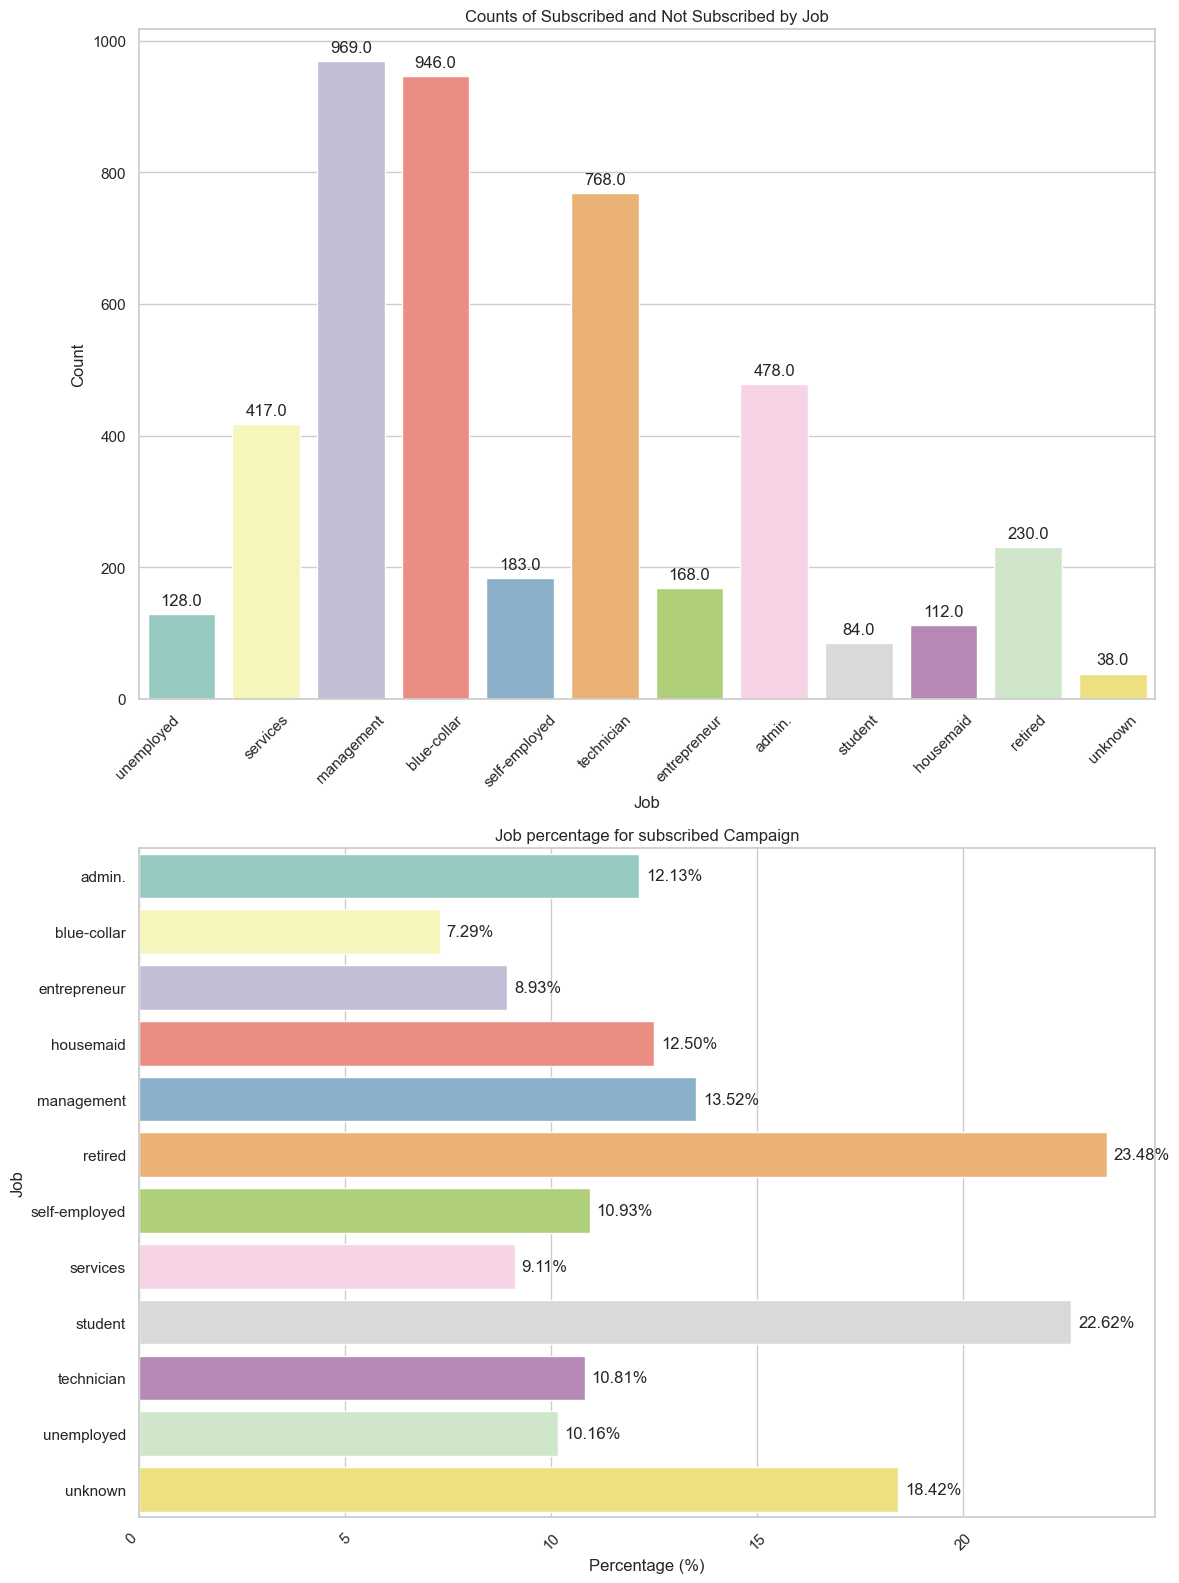

In [142]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

sns.countplot(x="job", data=df, palette="Set3", ax=axes[0])
sns.barplot(x="percentage_subscribed", y="job", data=pivot_df, palette="Set3", ax=axes[1])

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[0].set_title('Counts of Subscribed and Not Subscribed by Job')
axes[0].set_xlabel('Job')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].get_xticklabels()[0].set_ha('right')


for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', xytext=(5, 0), textcoords='offset points')
    
axes[1].set_title('Job percentage for subscribed Campaign')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_ylabel('Job')
axes[1].tick_params(axis='x', rotation=45)
axes[1].get_xticklabels()[0].set_ha('right')  


plt.tight_layout()


plt.show()

Dalam campaign yang dilakukan, mayoritas pekerjaannya adalah blue collar sebanyak 969 orang lalu posisi kedua adalah management sebanyak 946 orang sedangkan untuk pekerjaan yang paling sedikit dijadikan target campaign adalah unkown sebanyak 31 orang lalu student sebanyak 65 orang. 

Dari hasil campaign maka diperoleh data pekerjaan yang setuju untuk subscribe, dan ternyata pekerjaan dengan persentase subscribe terbnayak adalah retired sebanyak 23,48% dan student sebanyak 22,62% hal tersebut dapat disebabkan karena dua hal yang pertama adalah minat dari kedua pekerjaan tersebut memang besar untuk subscribe dan yang kedua jumlah target campaign untuk kedua pekerjaan itu terlalu sedikit sehingga ketika ada yang subscribe jumlah persentasenya naik dengan drastis. 

Dari grafik tersebut yang menarik adalah data retired dimana jumlah orang yang  dilakukan campaign sebanyak 230 orang dan merupakan pekerjaan terbanyak ke enam namun mendapatkan persentase subscirbe terbesar yaitu 23,48% sehingga nantinya dapat dilakukan penambahan persentase retired yang dijadikan target untuk campaign berikutnya. Selain dari posisi retired yang menarik juga adalah pekerjaan management yang merupakan mayoritas pekerjaan yang dijadikan target namun masih menempati posisi ketiga dalam hal persentase subscribe sebesar 13,52%, sehingga menjadikan management sebagai target campaign terbesar sudah tepat

In [106]:
df.groupby('job').agg({'balance': 'mean'})

,balance
job,
admin.,1226.736402
blue-collar,1085.161734
entrepreneur,1645.125000
housemaid,2083.803571
management,1766.928793
retired,2319.191304
self-employed,1392.409836
services,1103.956835
student,1543.821429


C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\390461642.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")


Text(0.5, 1.0, 'Type of Work by Term Suscriptions')

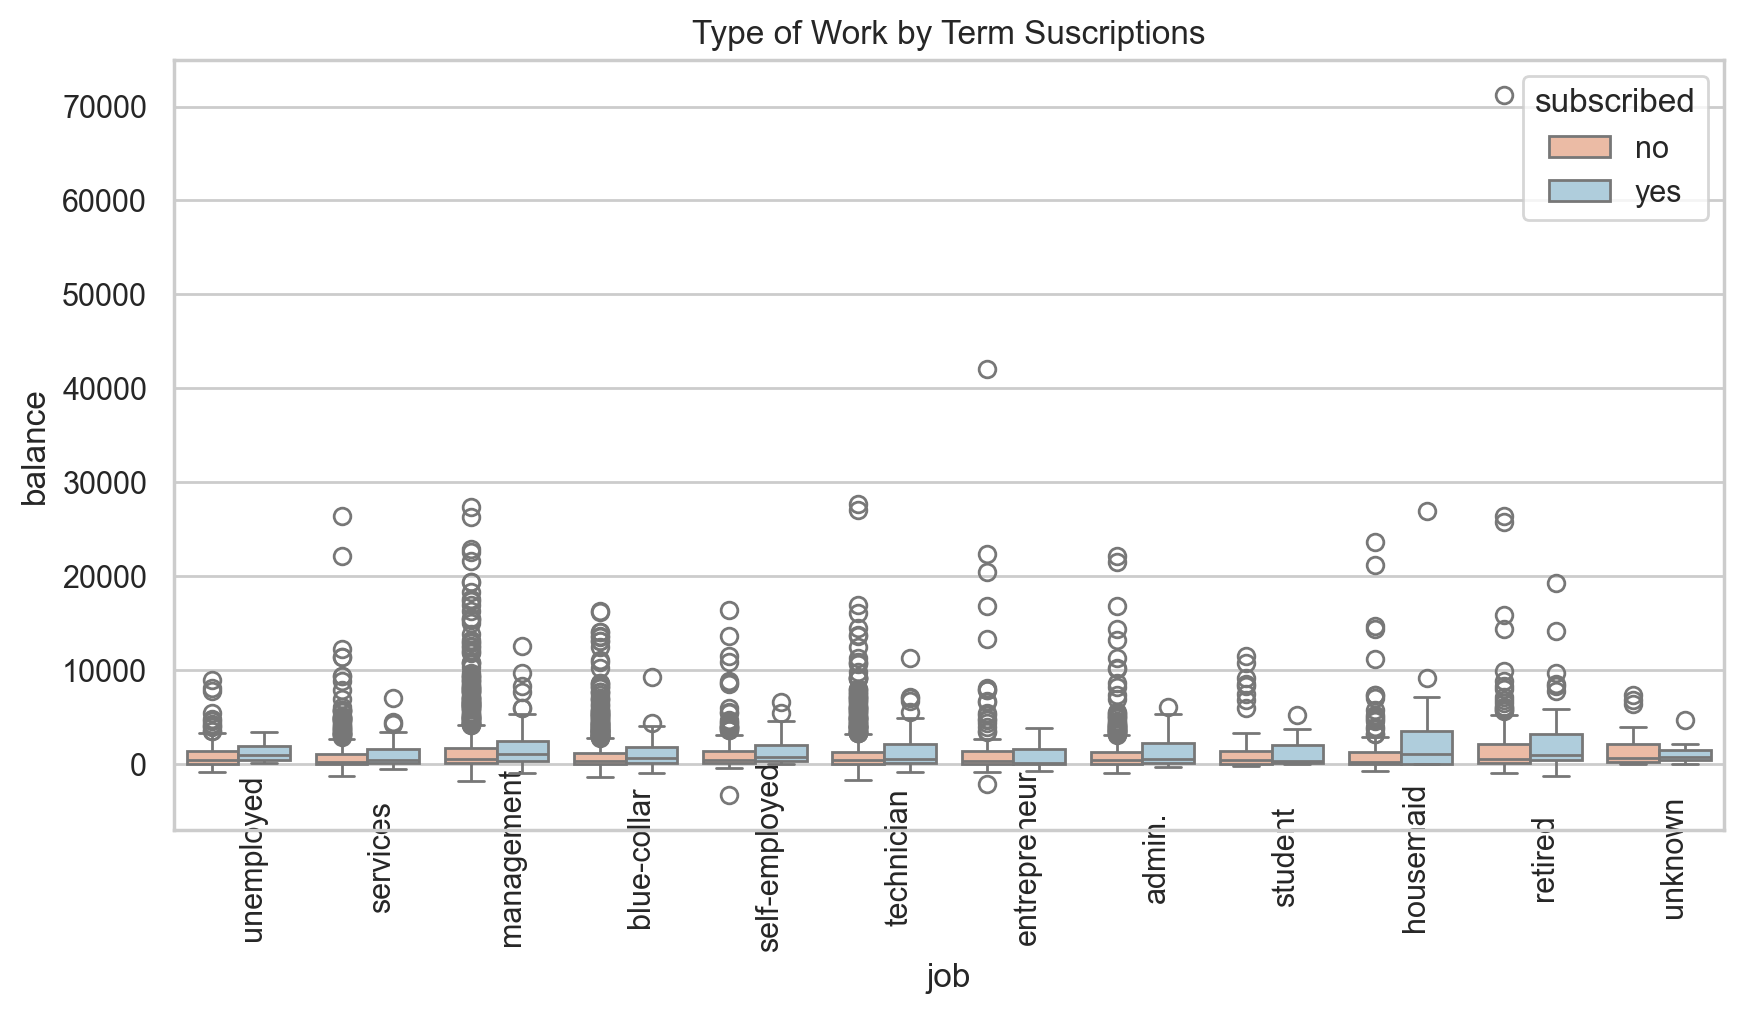

In [103]:
fig = plt.figure(figsize=(10, 5), dpi=200)

ax = sns.boxplot(x="job", y="balance", hue="subscribed",
                 data=df, palette="RdBu")

ax.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
ax.set_title("Type of Work by Term Suscriptions")

Jika melihat dari boxplot dapat diketahui pekerjaan yang memiliki balance tertinggi adalah retired lalu house maid, dan nilai balance untuk housemaid yang subscribe merupakan yang tertinggi. Dari boxplot juga dapat diketahui bahwa mayoritas yang subscribe dengan campaign yang dilakukan atau setuju adalah mereka yang memiliki balance yang tinggi, sehingga sangat tepat untuk melakukan campaign kepada mereka yang memiliki balance yang tinggi seperti housemaid dan retired

C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\2891391843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="job", y="age", data=subscribed_df, palette="Set3", ax=axes[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\2891391843.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="job", y="age", data=unsubscribed_df, palette="Set3", ax=axes[1])


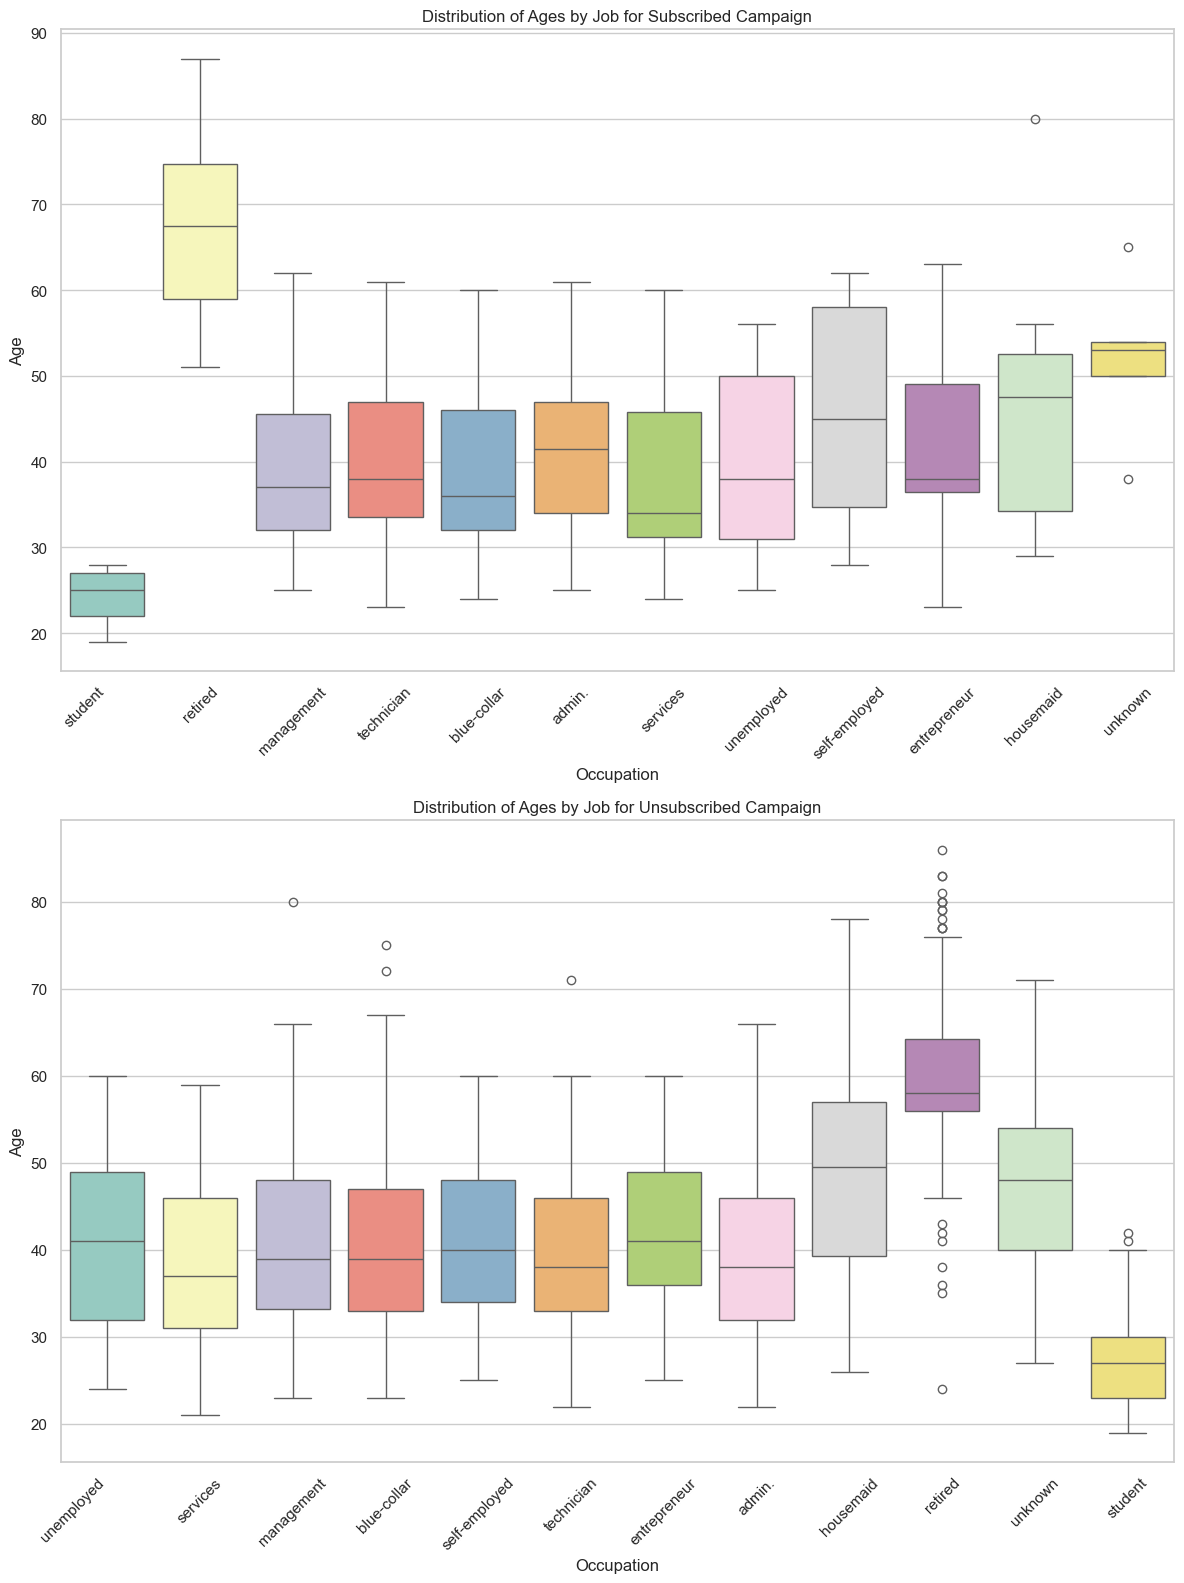

In [120]:
subscribed_df = df[df["subscribed"] == "yes"]
unsubscribed_df = df[df["subscribed"] == "no"]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

sns.boxplot(x="job", y="age", data=subscribed_df, palette="Set3", ax=axes[0])
sns.boxplot(x="job", y="age", data=unsubscribed_df, palette="Set3", ax=axes[1])


axes[0].set_title('Distribution of Ages by Job for Subscribed Campaign')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)
axes[0].get_xticklabels()[0].set_ha('right')  

axes[1].set_title('Distribution of Ages by Job for Unsubscribed Campaign')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=45)
axes[1].get_xticklabels()[0].set_ha('right')  


plt.tight_layout()


plt.show()

Jika melihat dari boxplot, pekerjaan dengan umur tertinggi adalah retired dan pekerjaan dengan umur terendah adalah student baik pada kategori subscribe dan tidak subscribe. Terdapat perbeedaan distribusi umur antara mereka yang subscribe dan tidak untuk tiap pekerjaannya, akan dilakukan analisa terkhusus untuk pekerjaan dengan persentase terbesar dalam melakukan subscribe yaitu retired, student dan management 

Pada pekerjaan retired terlihat bahwa mereka yang memiliki umur lebih tua cenderung subscribe dibandingkan yang tidak, hal itu dapat terlihat dari median retired yang subscribe lebih besar dibandingkan median dari retired yang tidak subscribe. Untuk student berlaku sebaliknya dimana mereka yang lebih muda cenderung subscribe untuk campaing, dibandingkan mereka yang lebih tua atau berada di umur 25 ke atas . Untuk management kedua umur antara yang subscribe dan unsubscribe cenderung sama dan tidak memberikan perbedaan yang signifikan seperti pekerjaan retired dan student

### Marital Status

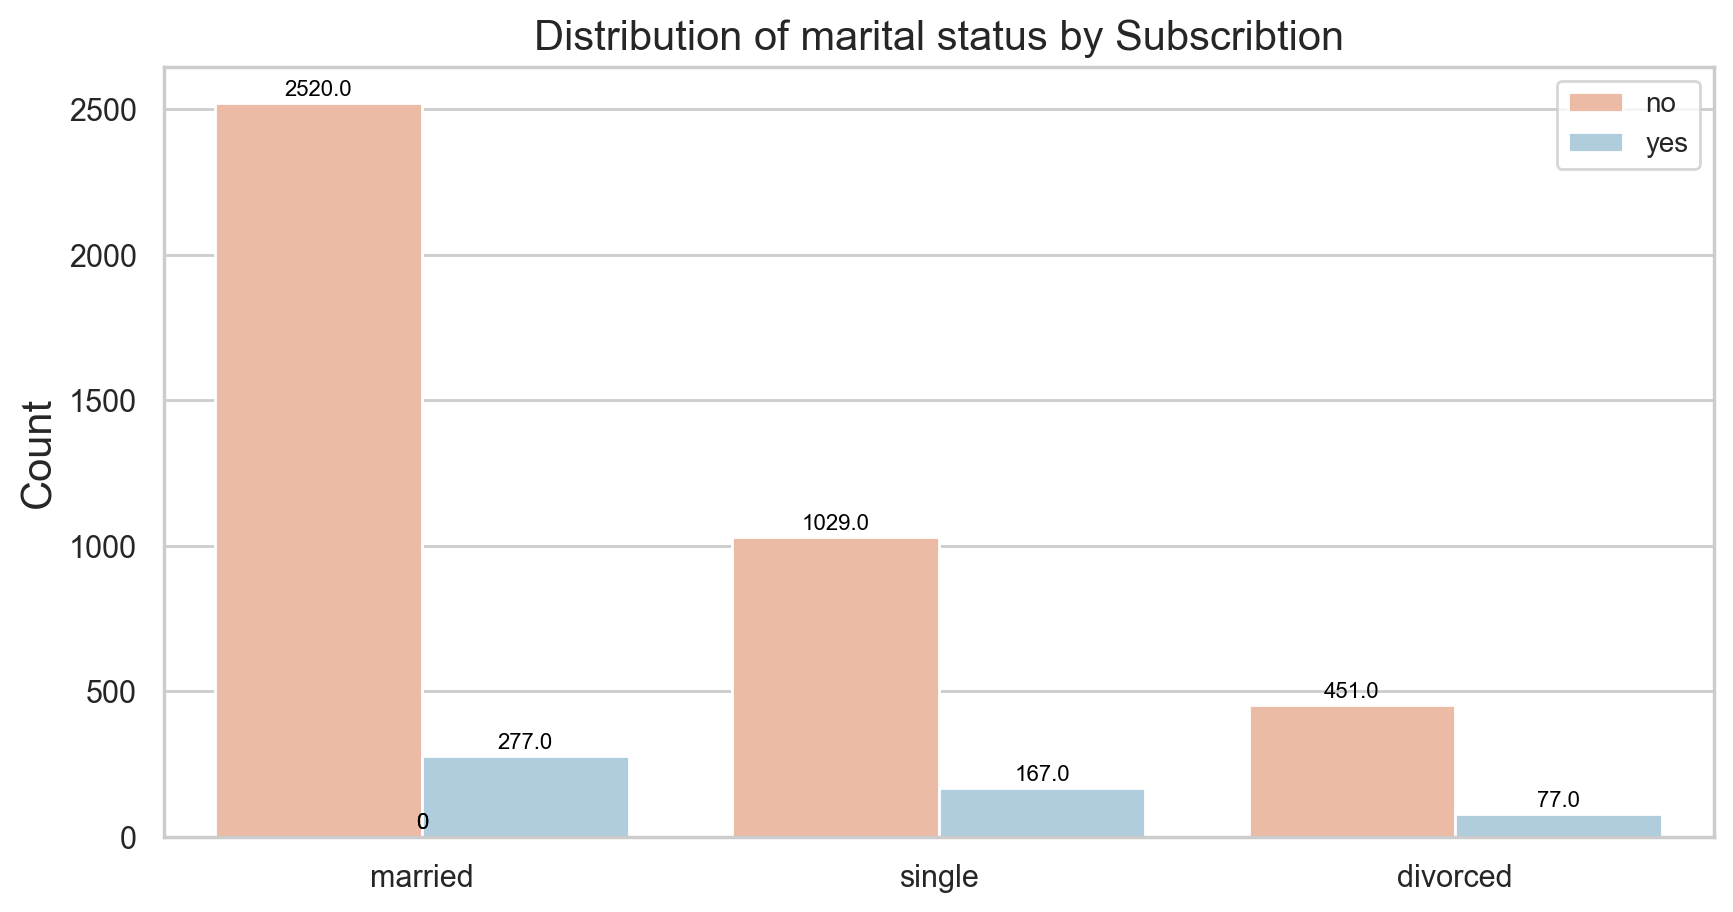

In [143]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='marital',hue='subscribed',data=df,palette="RdBu")
ax.set_title('Distribution of marital status by Subscribtion',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada marital status mayoritas terbesar yang dijadikan target adalah mereka yang sudah married dan yang paling sedikit adalah mereka yang sudah cerai

In [146]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

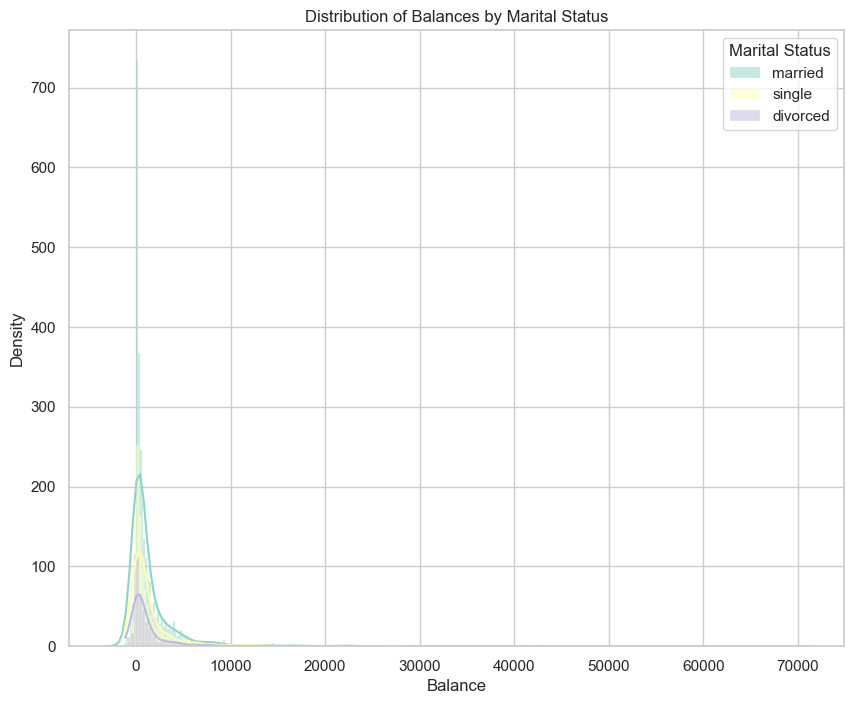

In [147]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

for marital_status in df['marital'].unique():
    subset = df[df['marital'] == marital_status]
    sns.histplot(data=subset, x='balance', kde=True, label=marital_status, color=sns.color_palette("Set3")[df['marital'].unique().tolist().index(marital_status)])

plt.title('Distribution of Balances by Marital Status')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend(title='Marital Status')

plt.show()

Dari visualisasi antara balance dan marital status dapat dilihat bahwa mereka yang cerai cenderung memiliki balance yang lebih sedikit dibandingkan mereka yang masih single dan sudah menikah, hal tersebut dapat disebabkan ketika cerai terjadi pemisahan harta(balance) antara kedua pihak yang menyebabkan berkurangnya balance

## Financial Status 

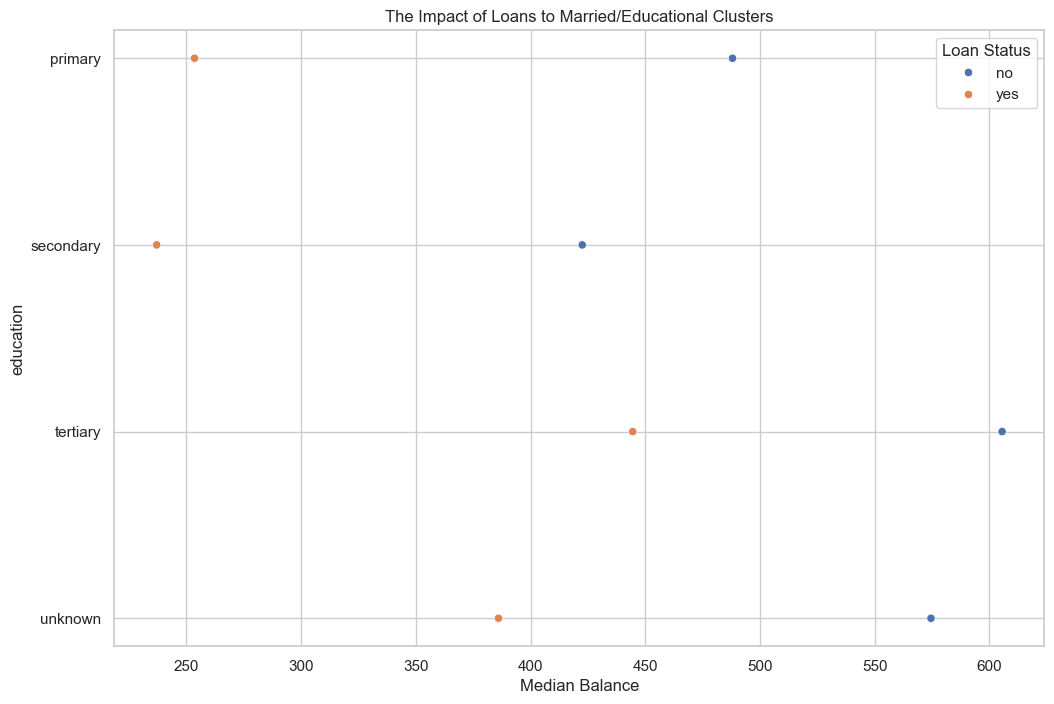

In [151]:
loan_balance = df.groupby(['education', 'loan'], as_index=False)['balance'].median()
loan_counts = df[df['loan'] == 'yes'].groupby('education')['loan'].count().reset_index(name='loan_count')
merged_df = pd.merge(loan_balance, loan_counts, on='education', how='left')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.scatterplot(data=merged_df, x='balance', y='education', hue='loan',
                sizes=(50, 200), legend='full')

plt.title("The Impact of Loans to Married/Educational Clusters")
plt.xlabel('Median Balance')
plt.ylabel('education')
plt.legend(title='Loan Status')

plt.show()

Dari scatterplot dapat diketahui bahwa mereka yang memiliki utang mengalami penurunan pada balance yang mereka miliki dan terjadi di semua jenjang edukasi, namun pada tertiary meskipun ia memiliki utang ternyata median balencenya masih lebih besar dibandingkan secondary yang tidak memiliki utang dan mendekati median balance primary yang memiliki utang

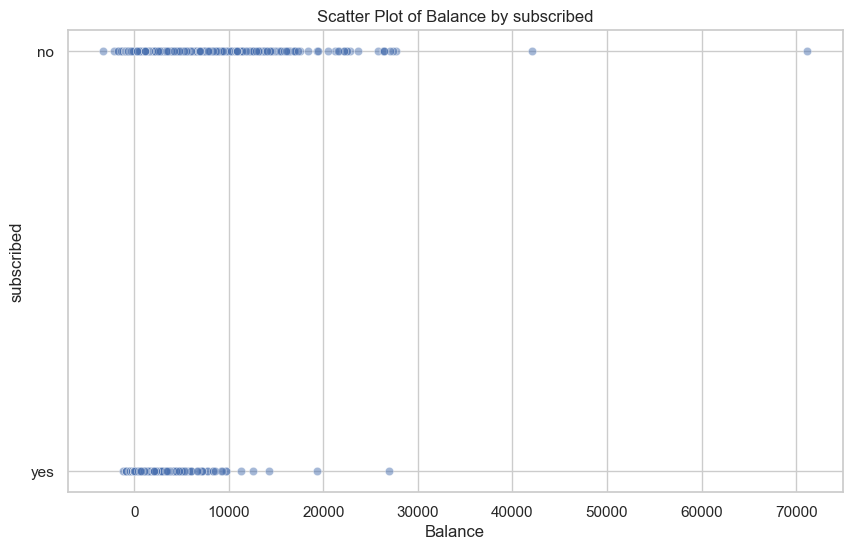

In [165]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='balance', y='subscribed', data=df, alpha=0.5)
plt.title('Scatter Plot of Balance by subscribed')
plt.xlabel('Balance')
plt.ylabel('subscribed')
plt.show()

Pada scatterplot memperlihatkan bahwa balance yang tinggi bukan merupakan penentu apakah seseorang akan subscirbe atau tidak, malah mereka yang memiliki balance antara 0-1000 yang memiliki kemungkinan lebih besar untuk subscribe dibandingkan mereka yang memiliki balance diatas 10000

## Current Campaign Information

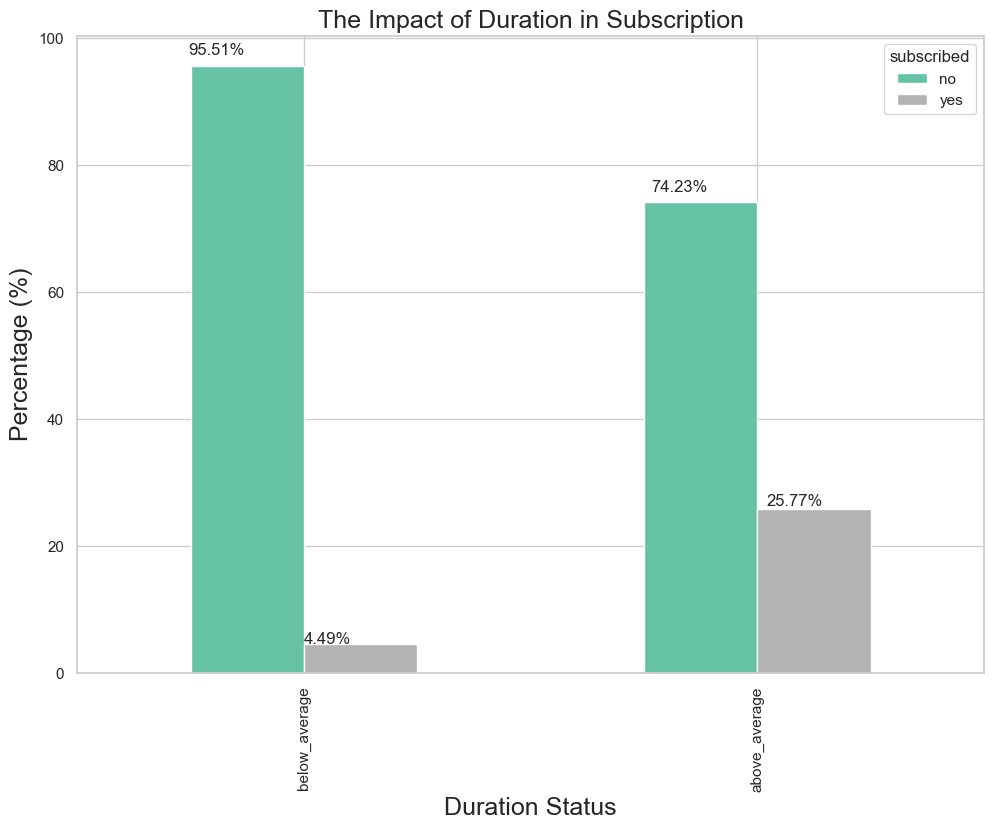

In [172]:
sns.set_style('whitegrid')

avg_duration = df['duration'].mean()

df['duration_status'] = pd.cut(df['duration'], bins=[-float('inf'), avg_duration, float('inf')],
                               labels=['below_average', 'above_average'])

pct_term = pd.crosstab(df['duration_status'], df['subscribed'], normalize='index') * 100

ax = pct_term.plot(kind='bar', stacked=False, cmap="Set2")

plt.title("The Impact of Duration in Subscription", fontsize=18)
plt.xlabel("Duration Status", fontsize=18)
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() * 1.02, p.get_height() * 1.02))

plt.show()

Pada barplot antara duration diatas rata" dan dibawah rata" ternyata mereka yang memiliki durasi telepon diatas rata" atau diatas 264 detik cenderung untuk setuju untuk subscribe sedangkan mereka yang below average cenderung untuk menolak subscribe. Dari informasi itu maka untuk menaikkan persentase yang subscribe maka diperlukan peningkatan durasi telepon bagi tiap target customer diatas 264 detik

In [175]:
new_duration = []

mean_duration = df['duration'].mean()

def get_duration(data):
    if duration_value < mean_duration:
        new_duration.append("Short duration")
    else:
        new_duration.append("Long duration")

for duration_value in df["duration"]:
    get_duration(duration_value)

df["duration_category"] = new_duration

In [182]:
grouped_df = df.groupby(['month', 'subscribed']).size().reset_index(name='count')


pivot_df = grouped_df.pivot(index='month', columns='subscribed', values='count').fillna(0)


pivot_df['percentage_subscribed'] = (pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])) * 100
pivot_df['percentage_not_subscribed'] = (pivot_df['no'] / (pivot_df['yes'] + pivot_df['no'])) * 100


print(pivot_df)

subscribed    no  yes  percentage_subscribed  percentage_not_subscribed
month                                                                  
april        237   56              19.112628                  80.887372
august       554   79              12.480253                  87.519747
december      11    9              45.000000                  55.000000
february     184   38              17.117117                  82.882883
january      132   16              10.810811                  89.189189
july         645   61               8.640227                  91.359773
juny         476   55              10.357815                  89.642185
march         28   21              42.857143                  57.142857
may         1305   93               6.652361                  93.347639
november     350   39              10.025707                  89.974293
october       43   37              46.250000                  53.750000
september     35   17              32.692308                  67

C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\2251901530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="month", data=df, palette="Set3", ax=axes[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\2251901530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="percentage_subscribed", y="month", data=pivot_df, palette="Set3", ax=axes[1])


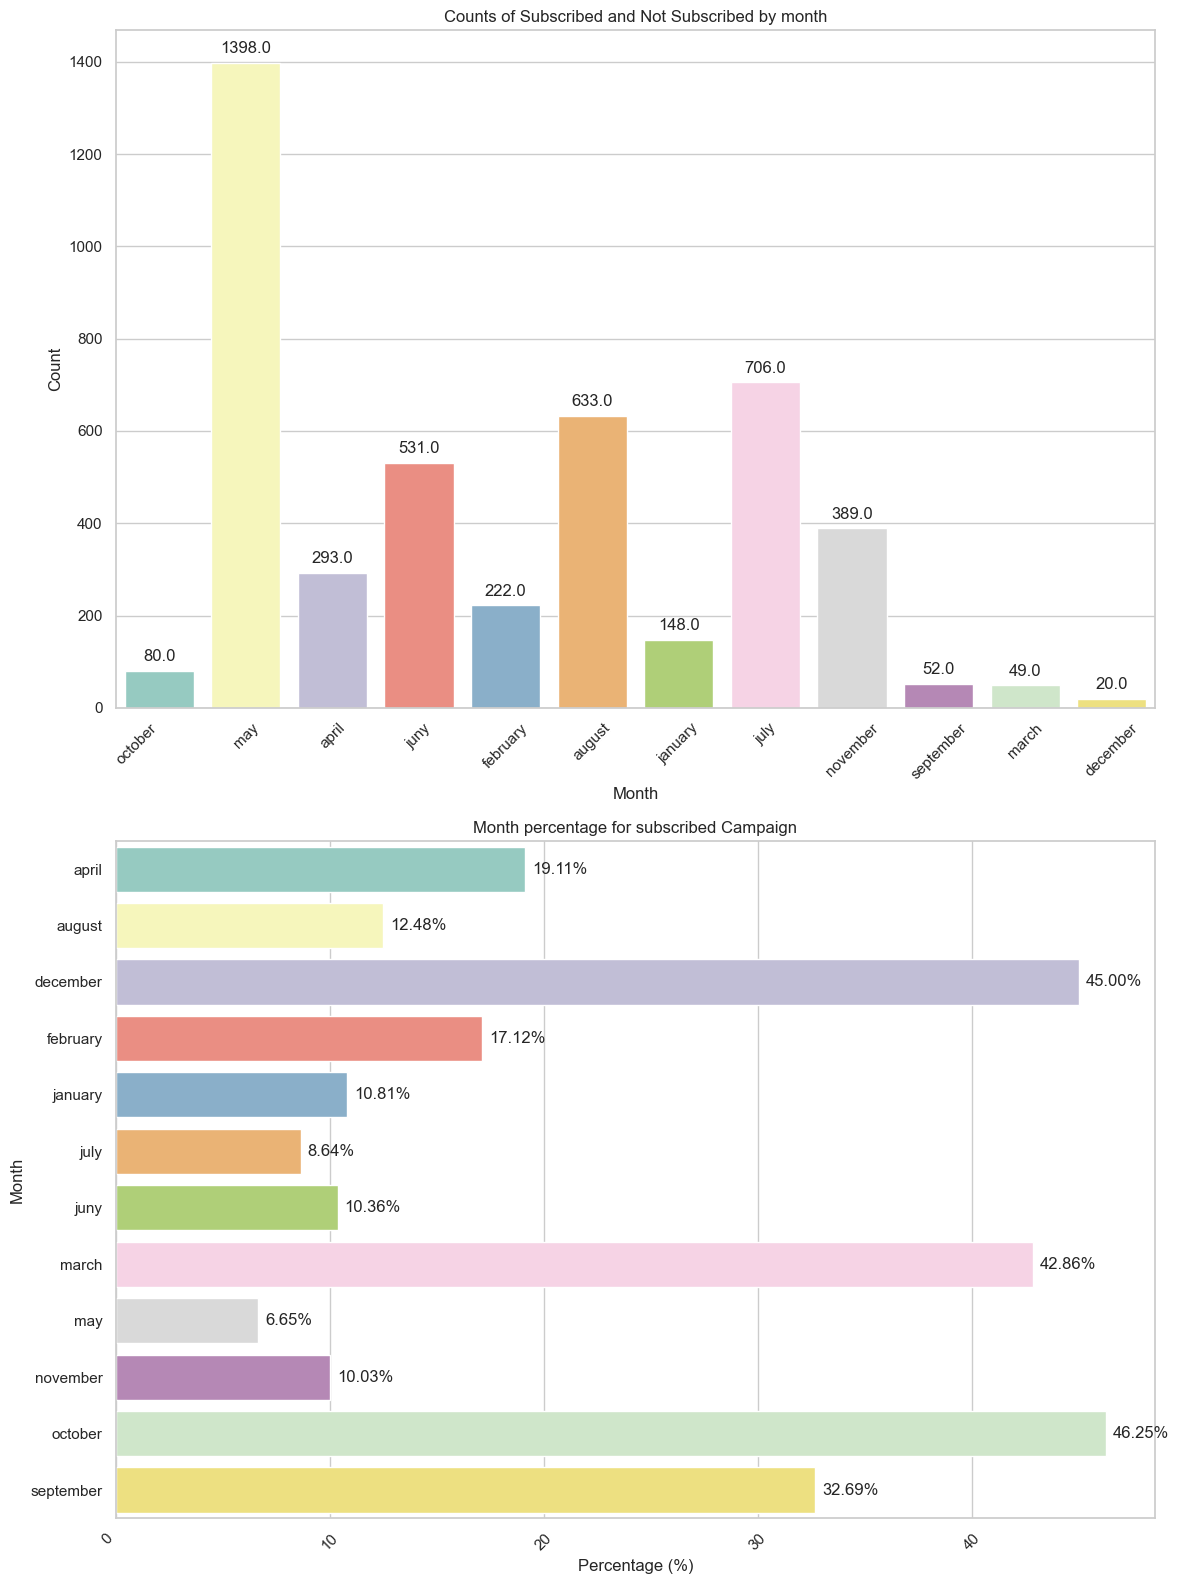

In [184]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

sns.countplot(x="month", data=df, palette="Set3", ax=axes[0])
sns.barplot(x="percentage_subscribed", y="month", data=pivot_df, palette="Set3", ax=axes[1])

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[0].set_title('Counts of Subscribed and Not Subscribed by month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].get_xticklabels()[0].set_ha('right')


for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='left', va='center', xytext=(5, 0), textcoords='offset points')
    
axes[1].set_title('Month percentage for subscribed Campaign')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_ylabel('Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].get_xticklabels()[0].set_ha('right')  


plt.tight_layout()


plt.show()

Pada grafik antara bulan dan subscription, mayoritas campaign dilakukan pada bulan May, July, August, dan June dimana pada bulan May campaign dilakukan sangat sering yaitu sebanyak 1398 kali dibandingkan dengan bulan terbanyak selanjutnya yaitu bulan july sebanyak 706 kali. Selain itu dari visualisasi juga dapat diketahui bahwa campaign paling banyak dilakukan pada akhir spring hingga summer lalu ketika fall dan winter campaign mulai jarang dilakukan

Meskipun campaign paling sering dilkaukan di bulan May, July, August, dan June ternyata bulan dengan persentase subscription terbanyak bukan dari keempat bulan tersebut namun berada pada bulan October sebesar 46,25 % dan disusul oleh bulan March sebesar 42,86%, sedangkan untuk bulan May sebagai bulan yang paling banyak dilakukan ads hanya memiliki persentase subscribe sebesar 6,65 persen dan menempati peringkat persentase terendah

In [190]:
season = []

def get_season(data):
    if data in ["january", "february", "december"]:
        season.append("Winter")
    elif data in ["march", "april", "may"]:
        season.append("Spring")
    elif data in ["june", "july", "august"]:
        season.append("Summer")
    else:
        season.append("Fall")

for month_value in df["month"]:
    get_season(month_value)

df["season"] = season

In [195]:
grouped_df = df.groupby(['season', 'subscribed']).size().reset_index(name='count')


pivot_df = grouped_df.pivot(index='season', columns='subscribed', values='count').fillna(0)


pivot_df['percentage_subscribed'] = (pivot_df['yes'] / (pivot_df['yes'] + pivot_df['no'])) * 100
pivot_df['percentage_not_subscribed'] = (pivot_df['no'] / (pivot_df['yes'] + pivot_df['no'])) * 100

subscribed    no  yes  percentage_subscribed  percentage_not_subscribed
season                                                                 
Fall         904  148              14.068441                  85.931559
Spring      1570  170               9.770115                  90.229885
Summer      1199  140              10.455564                  89.544436
Winter       327   63              16.153846                  83.846154


C:\Users\ACER\AppData\Local\Temp\ipykernel_72924\1009875041.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="percentage_subscribed", y="season", data=pivot_df, palette="Set3")


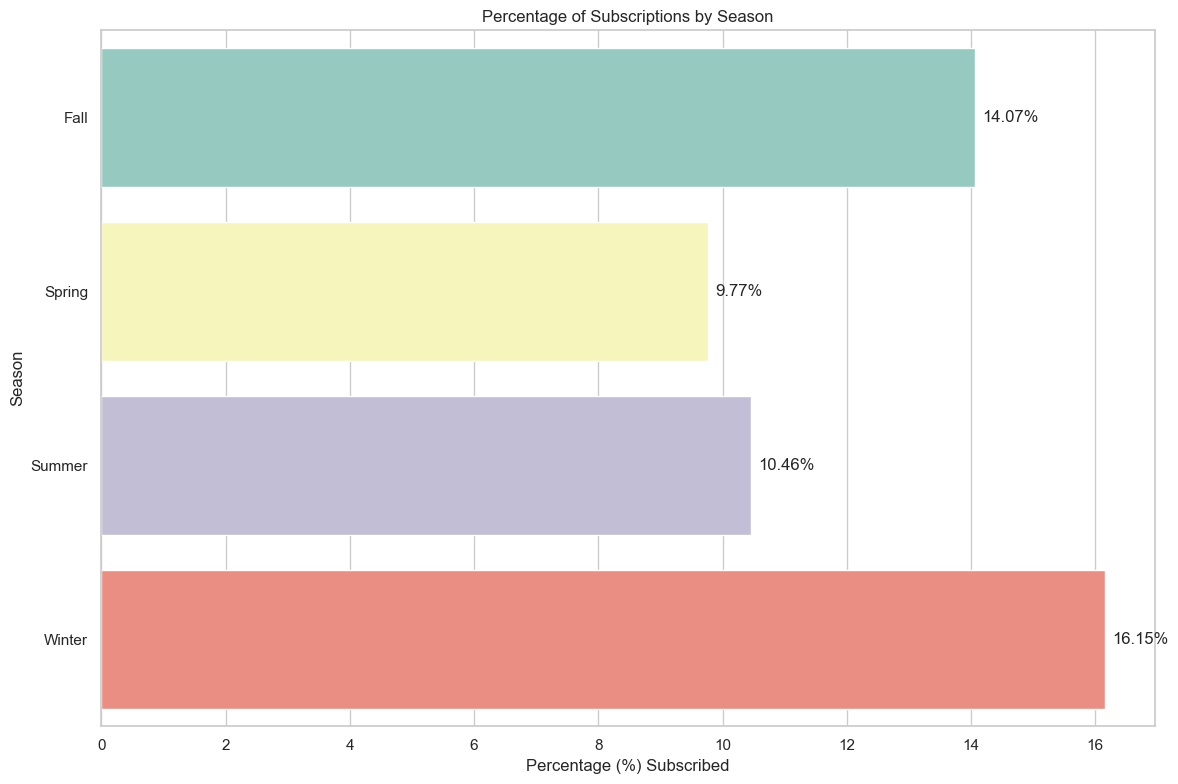

In [202]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x="percentage_subscribed", y="season", data=pivot_df, palette="Set3")

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Percentage of Subscriptions by Season')
plt.xlabel('Percentage (%) Subscribed')
plt.ylabel('Season')
plt.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


Setelah dilakukan pengelompokan bulan berdasarkan season maka diperoleh persentase subscription terbanyak di season winter dan fall, sehingga nantinya dapat dilakukan campaign yang lebih besar pada musim winter dan juga fall

In [203]:
df["previous"].unique()

array([ 0,  4,  1,  3,  2,  5, 20,  7,  6, 10,  9,  8, 18, 19, 12, 13, 11,
       14, 15, 24, 17, 22, 23, 25], dtype=int64)

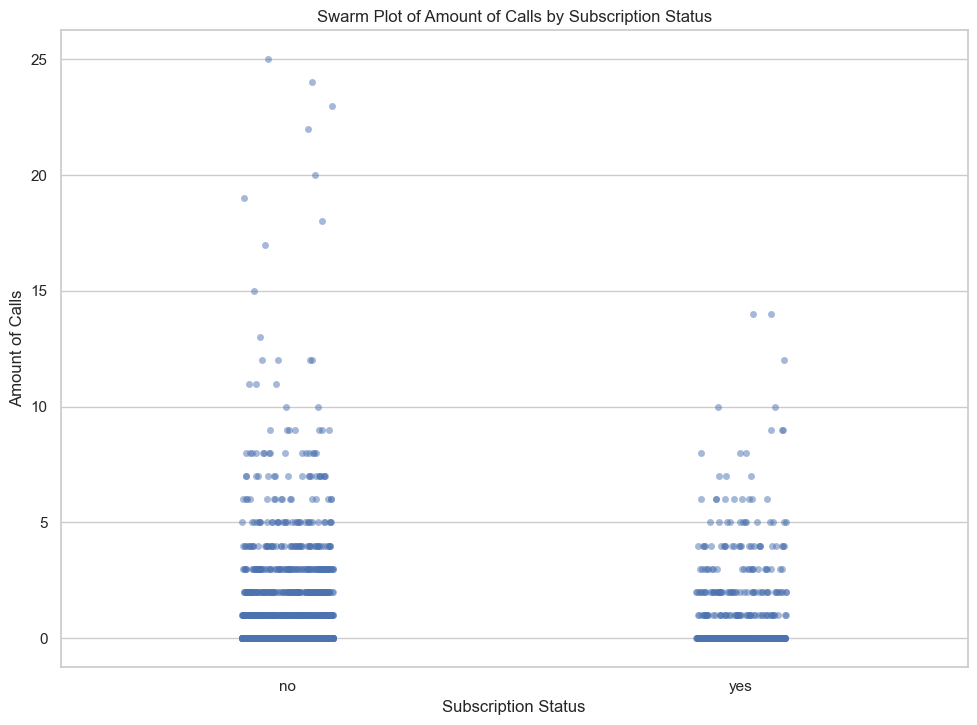

In [205]:
sns.stripplot(x="subscribed", y="previous", data=df, jitter=True, alpha=0.5)
plt.title('Swarm Plot of Amount of Calls by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Amount of Calls')
plt.show()

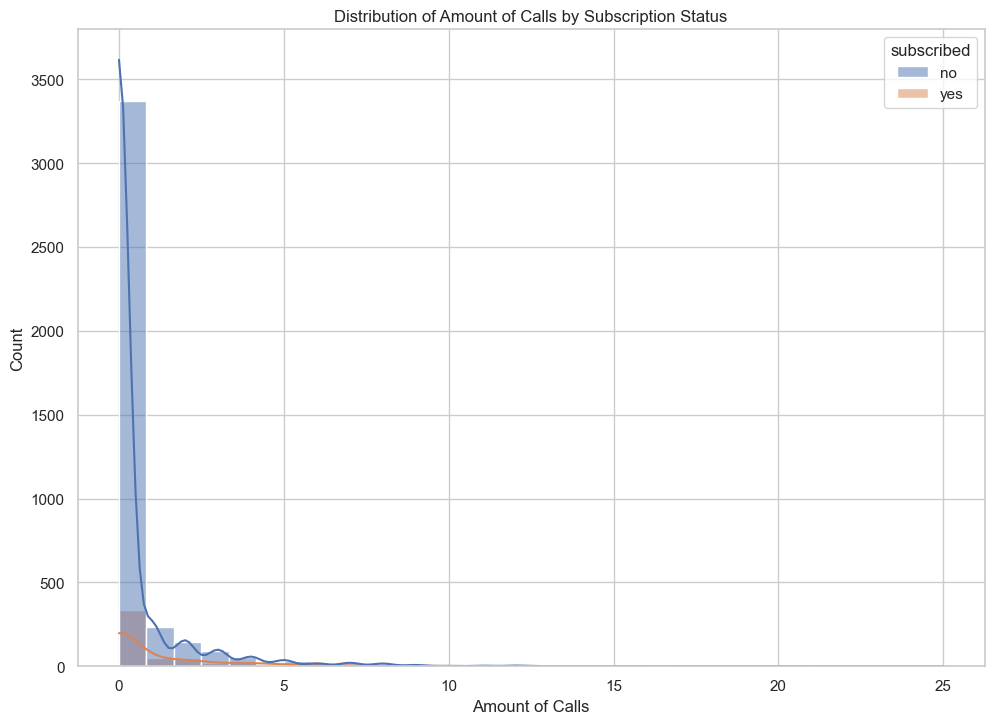

In [207]:
sns.histplot(x="previous", hue="subscribed", data=df, kde=True, bins=30)
plt.title('Distribution of Amount of Calls by Subscription Status')
plt.xlabel('Amount of Calls')
plt.ylabel('Count')
plt.show()

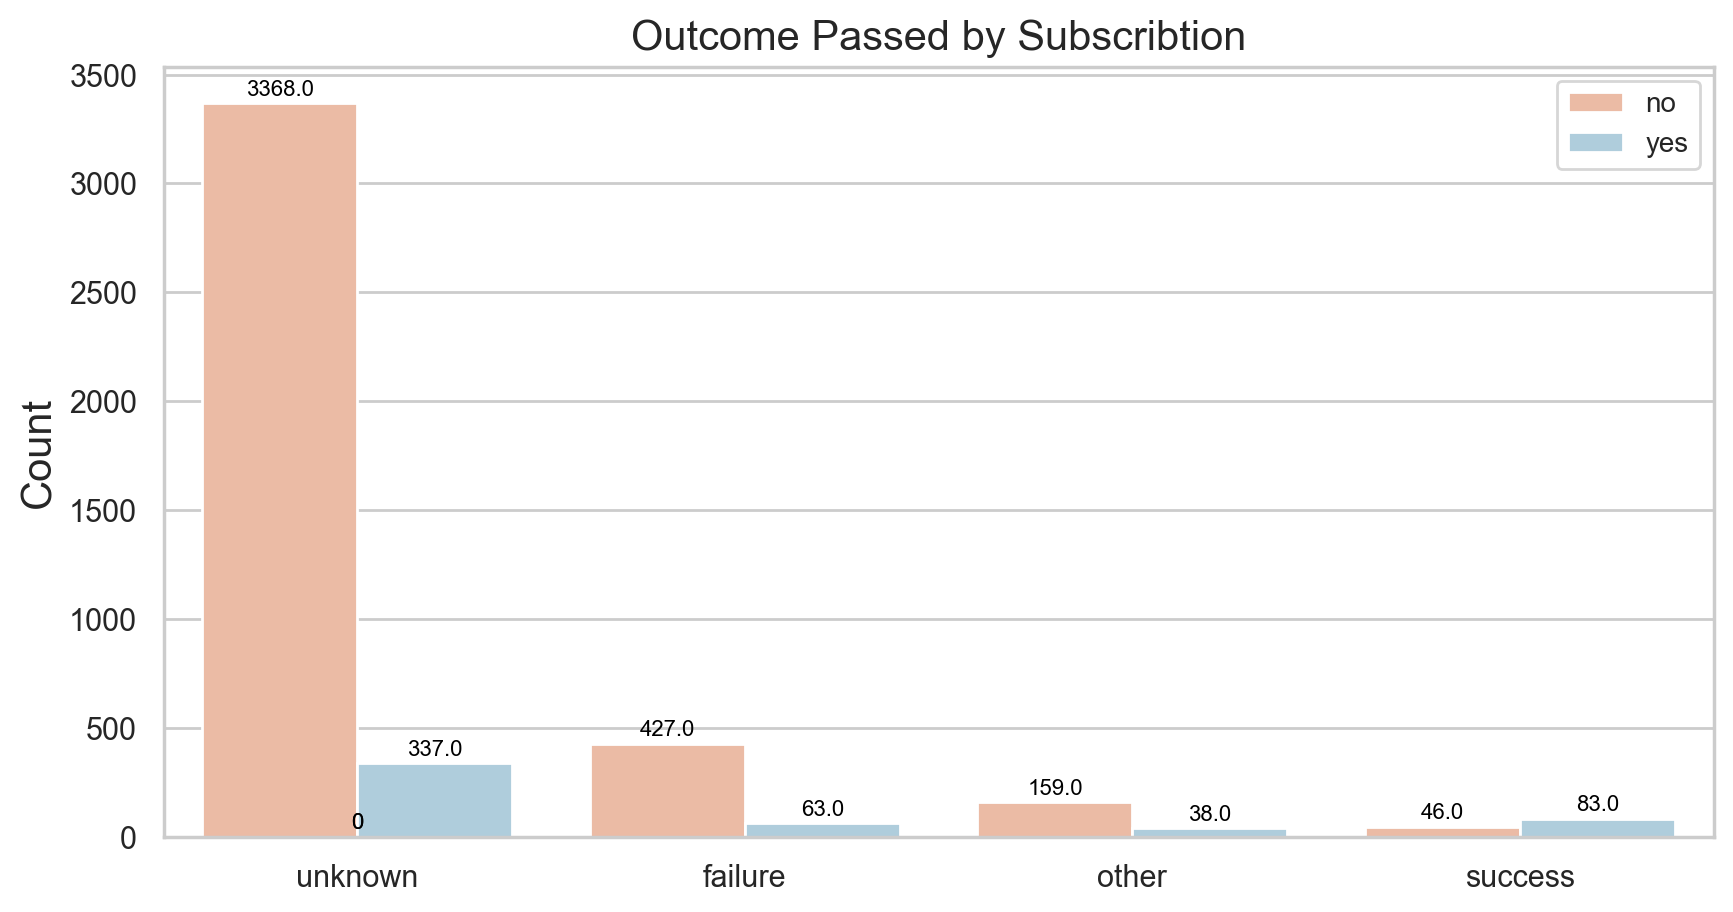

In [210]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='outcome_passed',hue='subscribed',data=df,palette="RdBu")
ax.set_title('Outcome Passed by Subscribtion',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Outcome passed merupakan feature yang memberitahu apakah customer pernah subscribe atau tidak, dan dari visualisasinya ternyata mereka yang pernah subscribe cenderung untuk subscribe apabila diberikan campaign yang lain sedangkan mereka yang pernah ditawari dan tidak ingin kemungkinan besar tetap tidak setuju apabila ditawari lagi

# Kesimpulan

Setelah dilakukan analisis terhadap feature dan target(subscribed), maka diperoleh beberapa informasi yang dapat digunakan untuk campaign selanjutnya.

- Kategori umur

Untuk melakukan campaign selanjutnya sebaiknya melakukan target pada generasi Z dan baby boomer, karena ketika dilihat dari grafik memang yang setuju untuk subscription kecil namun memiliki persentasi subscription yang lebih tinggi dibandingkan dengan millenial yang dijadikan target mayoritas namun memiliki persentasi subscription yang sangat kecil. Oleh karena itu untuk campaign selanjutnya dapat menargetkan genrasi z dan baby boomer

- Bidang pekerjaan

Pada bidang pekerjaan hal yang dapat ditingkatkan ketika ingin melakukan campaign berikutnya adalah menargetkan mereka yang sudah pensiun(retire) dan pelajar serta tetap menargetkan pekerja manejemen. Penargetan pensiun dan pelajar disebabkan sangat sedikitnya campaign yang dilakukan kepada mereka padahal mereka adalah pekerjaan yang paling banyak persentase subscriptionnya dibandingkan pekerjaan lain, untuk pekerjaan manajer harus tetap menjadi target utama karena meskipun menjadi mayoritas dengan target terbesar namun persentase subscriptionnya masih menempati peringkat ke-4 dari pekerjaan yang lain

- Bulan Campaign

Dari bulan campaign ternyata paling banyak dilakukan pada bulan May padahal secara persentase subscription bulan ini merupakan bulan yang paling rendah sehingga seharusnya dalam melakukan campaign tidak dilakukan secara massive di bulan may, tetapi dapat dicoba dilakukan pada bulan october, maret, dan december dikarenakan ketiga bulan tersebut memperoleh persentase subscription diatas 45% 